<a href="https://colab.research.google.com/github/ck-chaudhary/LSH/blob/master/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Locality sensitive hashing using MinHash

The idea behind locality sensitive hashing is to take the document fingerprints and chop them up into pieces, each piece being some number of `minhash`es. Since a single `minhash` (single entry in the fingerprint) has a probability equal to the Jaccard similarity of producing a collision, each chopped up portion of the fingerprint should as well. This chopped up portion is the `locality` in locality sensitive hashing, the `hashing` is just a hash function (any hash function) which produces a `bin ID` from the fingerprint `locality` being hashed. Each bin holds the entire fingerprint (with optional meta information) of the document and that of other documents that hash to the same `bin`.

Let's say our fingerprint has 100 `minhash`es in it and we chop the fingerprints into 10 pieces. Each piece of each fingerprint therefore contains 10 `minhash`es, we hash those again (not using `minhash` this time) to get a `bin ID` and store the whole fingerprint in every bin each of the pieces happens to land in.

When we want to know which documents are similar to a query document, we look in all the bins the query document lands in, any document in any of the bins is a potential duplicate. Comparing the full fingerprint of all documents in the bin or computing the actual Jaccard similarity between the shingle sets yields the final similarity of documents. Crucially _since not all documents will land in the same bins we've reduced the number of comparisons needed to find similar or near duplicate documents_.

The number of pieces to chop each fingerprint into and the size of each piece are parameters that need to be set. These should be set such that $num\_pieces \times size\_of\_piece == num\_minhashes$ - this makes sense since having computed all the $N$ `minhash`es we want to use all of them in the locality sensitive hashing part. There is however a further issue that needs to be considered when setting the parameters; the relation between the number and size of the pieces and the probability of LSH "finding" a pair of similar documents.

LSH is a probabilistic model which means that it won't always do the "right thing". Using LSH one needs to consider the similarity of a pair of documents (in this case the Jaccard similarity) and the probability that LSH will find that pair to be similar (a true positive, i.e. a correctly discovered duplicate pair). The pair of documents LSH finds to be similar should be thought of as _candidate_ duplicates. The higher the probability, or guarantee, that LSH will find a pair of documents to be similar the more false positives the model will also produce, that is candidate duplicates that are not in fact duplicates.

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

ix = pd.IndexSlice

## How setting LSH parameters affects finding similar documents

Create a pandas dataframe with different configurations for b and r values. The different sizes are as follows: (2, 50), (50, 2), (10, 10), (5, 20), (20, 5).

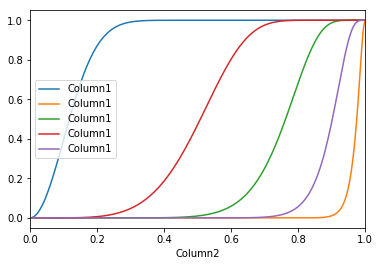

In [394]:
thresh = np.arange(0,1.005,0.005)
br_lst = [(2,50),(50,2),(10,10),(5,20),(20,5)]
ax = None
for k in br_lst:
  p=[];b=k[0];r=k[1]
  for t in thresh:
    p.append(1-(1-(t**b))**r)
    
  df = pd.DataFrame({'Column1':p, 'Column2':thresh})
  ax = df.plot(ax=ax,x='Column2',y='Column1')

In [0]:
# df=pd.DataFrame(data)
# df

In [0]:
# r=[50,2,10,20,5]
# b=[2,50,10,5,20]
# y=[]
# x=np.arange(0,1.005,.005)
# for i in range(0,5):
#   y=1-(1- x ** r[i])**b[i]
#   plt.plot(x,y,color="lightblue")
#   plt.show()

For every b and r compute the probability values using the equation discussed in class i.e, $p = 1 - (1 - t^b)^r$. Vary the threshold value from 0 to 1 with around 200 intervals.

Create a pandas pivot table with the columns hashes, bands, row.

Initialize a plot with figsize of (10, 7) and title "Probability of LSH of finding a candidate pair"

Set ylabel to be "p" and xlabel to be "Jaccard Similarity". Now display the plot with the different values. 

## Computing LSH

Now import the MinHash function from your last assignment to get the MinHashSim matrix. You may re-insert the entire function too here.

Now set the different parameters that you shall need from the MinHashSim matrix. Like, the numHashes, numBands, numRows, and numRowsPerBand

data = {'Name':['Tom', 'nick', 'krish', 'jack'],
        'Age':[20, 21, 19, 18]}

Write the LSH function that will re-use the same hash functions computed for MinHash to iterate through every band (and every document in the band) and find out the new hash value. Create a new list for the band and check if the hash value is already in it. If not then add the new hash value.

Maintain a global dictionary of buckets (for every band) and keep adding the buckets as and when they are created.

Now write a getNearest(n) function, which will find out that for a document 'n' find out and display the nearest documents as a list of document numbers. 

Now set a threshold and find out how many false positives and false negatives you are getting. You have to now compare with the JaccSim matrix to get the document similarities.

Repeat the experiments for the docs_1000, docs_2500, and docs_10000 data sets. To be downloaded from this git link. : https://github.com/dipsankarb/data.git . Also, please do not push the data files while submitting the assignment.

In [0]:
import os
import re
import random
import time
import binascii

In [0]:
numHashRows = 150;
b=10
r=15
tstart=time.time()

In [0]:
numDocs = 10000 # Start with 100. Meaning there are 100 articles in 1 data file (same as 100 individual docs).
dataFile = "/content/drive/My Drive/Data_analytics/cs606-lab4-ck-chaudhary/data-master/docs_" + str(numDocs) + ".train"
plagFile = "/content/drive/My Drive/Data_analytics/cs606-lab4-ck-chaudhary/data-master/docs_" + str(numDocs) + ".plag"

In [400]:
plagiarisms = {}

# Open the plag file.
f = open(plagFile, "rU")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


In [401]:
# For each pair reported
for line in f:
  
  # Remove new-line character if present
  if line[-1] == '\n':
      line = line[0:-1]
      
  docs = line.split(" ")
 # print(docs)

  # Keep a map of the two documents
  plagiarisms[docs[0]] = docs[1]
  plagiarisms[docs[1]] = docs[0]

# Now convert the documents to shingles
#print(plagiarisms)


['t1088', 't5015']
['t1297', 't4638']
['t1768', 't5248']
['t1952', 't3495']
['t980', 't2023']
['t2535', 't8642']
['t2839', 't9303']
['t2957', 't7111']
['t3268', 't7998']
['t3466', 't7563']
['t3575', 't8979']
['t3725', 't4099']
['t4467', 't6205']
['t4530', 't7907']
['t906', 't5442']
['t5551', 't7693']
['t969', 't6244']
['t7270', 't8387']
['t7527', 't8101']
['t787', 't9596']
['t8306', 't8805']
['t840', 't9579']
['t8826', 't9285']
['t1012', 't9363']
['t1142', 't2475']
['t1206', 't4591']
['t492', 't1436']
['t1488', 't9549']
['t5304', 't7320']
['t7412', 't7623']
['t104', 't4172']
['t1057', 't5702']
['t1295', 't6680']
['t1374', 't3257']
['t1403', 't5999']
['t764', 't1513']
['t1583', 't9230']
['t1621', 't7958']
['t1726', 't9170']
['t1782', 't7716']
['t1898', 't8090']
['t1998', 't5871']
['t2001', 't5239']
['t2100', 't6571']
['t2121', 't3020']
['t2356', 't4015']
['t2390', 't4969']
['t673', 't2432']
['t269', 't8413']
['t288', 't6999']
['t3072', 't7923']
['t797', 't3088']
['t3136', 't8469']
['t32

In [402]:
# Now convert the documents to shingles

print("Creating shingles....")

# Keep a current ID for the current shingle. When a new shingle is encountered in
# the dictionary, we will update this.

currentShingleID = 0

# Create a dictionary for the articles having a mapping of the article identifier
# for example t123, to the list of the shingle IDs.

documentShingleSets = {};
  
# Open the data file.
f = open(dataFile, "rU")

documentNames = []

numShingles = 0

Creating shingles....


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: 'U' mode is deprecated
  from ipykernel import kernelapp as app


In [0]:

for i in range(0, numDocs):
   
    
      

  # ADD CODE HERE TO DO THE FOLLOWING:

  # Read all the words (may need splitting)
  # Maintain a list of document IDs (article IDs)

  # Create a set of shingles called shinglesInDocument

  # For each word in document create a shingle by combining 3 consecutive
  # words together. This is where the Python set will help as it will 
  # automatically remove duplicate shingles.

  # Use the binascii library to hash every shingle to a 32 bit integer.
  # Read binascii manual to find out how to use them.
  # Add the hashed value to the set.

  # Now add the completed set of shingles to the documentShingleSets dictionary.
  # Keep a count of the total number of shingles found in numShingles.

# Close the data file.  
    
  # Read all of the words (they are all on one line) and split them by white
  # space.
  words = f.readline().split(" ") 
  
  # Retrieve the article ID, which is the first word on the line.  
  docID = words[0]
  
  # Maintain a list of all document IDs.  
  if(docID):
    documentNames.append(docID)
 #print(documentNames)
    
  del words[0]  
  
  # 'shinglesInDoc' will hold all of the unique shingle IDs present in the 
  # current document. If a shingle ID occurs multiple times in the document,
  # it will only appear once in the set (this is a property of Python sets).
  shinglesInDoc = set()
  
  # For each word in the document...
  for index in range(0, len(words) - 2):
    # Construct the shingle text by combining three words together.
    shingle = words[index] + " " + words[index + 1] + " " + words[index + 2]
    #print(shingle)

    # Hash the shingle to a 32-bit integer.
    crc = binascii.crc32(shingle.encode()) & 0xffffffff
    
    # Add the hash value to the list of shingles for the current document. 
    # Note that set objects will only add the value to the set if the set 
    # doesn't already contain it. 
    shinglesInDoc.add(crc)
  
  # Store the completed list of shingles for this document in the dictionary.
  documentShingleSets[docID] = shinglesInDoc
  #if(i==0):
    #print(documentShingleSets)
  
  # Count the number of shingles across all documents.
  numShingles = numShingles + (len(words) - 2)

# Close the data file.
#f.close()  

In [404]:

 
print ('\nAverage shingles per doc: %.2f' % (numShingles / numDocs))


Average shingles per doc: 251.99


In [0]:
#Find out how many elements you will need
totalSize = int(numDocs * (numDocs - 1) / 2)

# Now intiialize two lists to store 2 similarity values. 
# 1. JaccSim to store the Jaccard Similarity
# 2. MinHashSim will be the estimated similarity by comparing the MinHash signatures.

JaccSim = [0 for x in range(totalSize)]
MinHashSim = [0 for x in range(totalSize)]

In [406]:
# Define a function to map a 2D matrix co-ordinate to a 1D index.
# If you use triangular matrix, then this logic will change. The idea
# is explained in MMDS book Chap 6.

# def getMatrixIndex(i, j):
#   index=0
#   k=0
#   while(k < i):
#     index=index+numDocs-k-1
#     k=k+1
    
   
#   return (index + j-i-1)

#normal getMatrix fails for 10000 documents

def getMatrixIndex(i, j):
    if i>j:
        k = int((j)*(numDocs-((j+1)/2.0))+i-(j))-1
    else:
        k = int((i)*(numDocs-((i+1)/2.0))+j-(i))-1

    return k


# ONE COMPARISON WILL BE TO STUDY HOW MUCH JACCARD SIMILARITY IS SLOWER THAN
# COMPUTING MIN HASH. INSERT TIMERS TO DO A COMPARISON

print ("\nCalculating Jaccard Similarities...")
tm = time.time()

#print(documentNames)
#print(documentShingleSets)
# For every document pair...
for i in range(0, numDocs):
 # print(documentNames[i])
  s1 = documentShingleSets[documentNames[i]]
      

      # Get shingle set for document i 
  for j in range(i + 1, numDocs):
    s2 = documentShingleSets[documentNames[j]]
          # Get shingle set for document j

          #Calculate and store the Jaccard Similarities
    if(len(s1.union(s2)) != 0):
      JaccSim[getMatrixIndex(i, j)] = (len(s1.intersection(s2)) / len(s1.union(s2)))
elapsed = (time.time() - tm)
print ("\nCalculating all Jaccard Similarities took %.2fsec" % elapsed)


# May need to delete JaccSim as it can be a very big matrix. Especially for larger 
# document sizes.
# del JaccSim



Calculating Jaccard Similarities...

Calculating all Jaccard Similarities took 1780.94sec


In [407]:
# Now perform Min Hashing. AGAIN YOU CAN INSERT TIMERS TO FIND OUT THE SPEED DIFFERENCE
# WITH JACC SIM.

print ('\nGenerate random hash functions...')

# Store the maximum shingle ID
maximumShingleID = 2**32-1

# FOR HASH FUNCTIONS IT IS BETTER TO USE PRIME NUMBERS.
# THIS WILL BE SIMILAR TO SETTING UP THE INFINITY VALUE OF THE LARGEST POSSIBLE HASH.
# ALSO THIS WILL REDUCE POSSIBLE COLLISIONS.
# YOU CAN FIND A PRIME NUMBER GREATER THAN maximumShingleID at the following URL.
# http://compoasso.free.fr/primelistweb/page/prime/liste_online_en.php

oneLargePrime = 10000092337


# The hash function we will use will be of the following form:
#   h(x) = (a*x + b) % c
# Where 'x' is the input value, 'a' and 'b' are random coefficients, and 'c' is
# a prime number just greater than maximumShingleID.

# Now generate a list of 'k' random coefficients while also ensuring that the
# random number you pick for 'a' and 'b' is unique.



Generate random hash functions...


In [0]:


def generateRandomCoefficients(k):
  
    #List of k random coefficients
    randomCoeffList = []
    while (k > 0):
    # Get a random shingle ID.
      randIndex = random.randint(0, maximumShingleID) 
  
    # Ensure that each random number is unique.
      while randIndex in randomCoeffList:
        randIndex = random.randint(0, maximumShingleID) 
    
    # Add the random number to the list.
      randomCoeffList.append(randIndex)
      k = k - 1

    return randomCoeffList

# For the 'numhashRows' number of hash functions, pick different 'a' and 'b'

coefficientsA = generateRandomCoefficients(numHashRows)
coefficientsB= generateRandomCoefficients(numHashRows)


In [409]:
print ('\nComputing MinHash signatures for all documents...')

# Create a list of documents as signature vectors
signatures = []

# Now write the code for the Fast MinHash algorithm. Rather than finding the random
# permutations of all shingles, just find out the hashes for the IDs that are 
# actually present in the document. Then take the lowest hash code value. This will
# be the index of the first shingle that you will encounter in the randomized order.
# For each document...



Computing MinHash signatures for all documents...


In [410]:
tm=time.time()
# For each document...
for documentID in documentNames:
  
  # Get the shingle set for this document.
  shingleIDSet = documentShingleSets[documentID]
  
  # The resulting minhash signature for this document. 
  signature = []
  
  # For each of the random hash functions...
  for i in range(0, numHashRows):
    
    # For each of the shingles actually in the document, calculate its hash code
    # using hash function 'i'. 
    
    # Track the lowest hash ID seen. Initialize 'minHashCode' to be greater than
    # the maximum possible value output by the hash.
    minHashCode = oneLargePrime + 1
    
    # For each shingle in the document...
    for shingleID in shingleIDSet:
      # Evaluate the hash function.
      hashCode = (coefficientsA[i] * shingleID + coefficientsB[i]) % oneLargePrime 
      
      # Track the lowest hash code seen.
      if hashCode < minHashCode:
        minHashCode = hashCode

    # Add the smallest hash code value as component number 'i' of the signature.
    signature.append(minHashCode)
  
  # Store the MinHash signature for this document.
  signatures.append(signature)

# Calculate the elapsed time (in seconds)
elapsed = (time.time() - tm)
        
print ("\nGenerating MinHash signatures took %.2fsec" % elapsed) 


Generating MinHash signatures took 455.97sec


In [0]:
tsignatures = list(map(list, zip(*signatures)))  

In [0]:
#print(signatures)

In [0]:
#print(tsignatures)

In [0]:
bucketSets={};
t0 = time.time()
    
for i in range(0, numDocs ):
    t=0
    c=0
    for j in range(0, numHashRows):
        x=tsignatures[j][i]
        h_code = (coefficientsA[j]*x + coefficientsB[j]) % oneLargePrime
        if t ==0:
                min_ = h_code
                t=1                
            
        if h_code < min_:
                min_ = h_code
        c=c+1
        if(c==r):
            try:
                bucketSets[str(min_)].add(documentNames[i])
            except:
                s = set()
                s.add(documentNames[i])
                bucketSets[str(min_)]= s
            t=0
            
#bucketSets        

In [415]:
# For every document pair...
threshold = 0.8

tp=0;fp=0
for x in bucketSets:
    if len(bucketSets[x])>1:
        for i in range(len(bucketSets[x])):
            buck_x = list(bucketSets[x])
            seti = documentShingleSets[buck_x[i]]
            for j in range(i+1,len(bucketSets[x])):
                # Get shingle set for document j
                setj = documentShingleSets[buck_x[j]]
                #Calculate and store the Jaccard Similarities
                if len(seti.intersection(setj))/len(seti.union(setj)) > threshold:
                    tp+=1
                else:
                    fp+=1
elapsed = (time.time() - t0)
total_time=(time.time() - tstart)
        
print ("\n LSH took %.2fsec\n" % elapsed) 
print("total_time_taken :\t %.2f\n"%total_time) 

print("numOfDocs :\t %d\n"%numDocs)
print("numOfHash :\t %d\n"%numHashRows)
print("band:\t\t %d\n"%b)
print("row per band :\t %d\n"%r)
print("threshold =\t %f\n"%threshold)
print("true positive :\t %d\n"%tp)  
print("false positive :\t %d\n"%fp) 



 LSH took 3.79sec

numOfDocs :	 10000

numOfHash :	 500

band:		 24

row per band :	 25

threshold =	 0.700000

true positive :	 80

false positive :	 10323



 LSH took 0.06sec

numOfDocs :	 1000

numOfHash :	 50

band:		 5

row per band :	 10

threshold =	 0.500000

true positive :	 10

false positive :	 101

 LSH took 0.06sec

numOfDocs :	 1000

numOfHash :	 50

band:		 5

row per band :	 10

threshold =	 0.700000

true positive :	 10

false positive :	 48


 LSH took 0.27sec

numOfDocs :	 2500

numOfHash :	 50

band:		 5

row per band :	 10

threshold =	 0.700000

true positive :	 18

false positive :	 494


 LSH took 0.52sec

numOfDocs :	 2500

numOfHash :	 250

band:		 5

row per band :	 50

threshold =	 0.700000

true positive :	 20

false positive :	 2515


 LSH took 3.79sec

numOfDocs :	 10000

numOfHash :	 500

band:		 24

row per band :	 25

threshold =	 0.700000

true positive :	 80

false positive :	 10323